# Step01a: Data Cleaning
In this notebook we'll clean the data.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
pitches = pd.read_csv('../../data/savant/sanchez_2019.csv')
sanchez = pitches.copy()

In [3]:
sanchez.head();

## Columns to lowercase and replace spaces with '_'

In [4]:
new_cols = []

for c in sanchez.columns:
    c = c.lower()
    c = c.replace(' ', '_')
    c = c.replace('(', '')
    c = c.replace(')', '')
    c = c.replace('_°', '')
    new_cols.append(c)
    
sanchez.columns = new_cols

In [5]:
sanchez.shape

(2690, 89)

In [6]:
sanchez.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

## Ok, there are 89 columns and not all are important for this experiement.  Let's make a few prelininary column removals.

### Of the 89 columns, the following pertain to the experiment:
- pitch_type
- game_date (for purposes of discovering the sequential order of pitches for creatin of new features)
- release_speed
- events 
- description
- zone
- des
- stand
- home_team
- away_team
- type
- balls
- strikes
- on_3b
- on_2b
- on_1b
- outs_when_up
- inning
- inning_topbot
- sv_id
- release_spin_rate
- pitch_number
- pitch_name
- home_score
- away_score
- bat_score
- fld_score
- if_fielding_alignment
- of_fielding_alignment

In [7]:
keep_cols = ['pitch_type', 'game_date', 'batter', 'release_speed', 'events', 'description', 'zone', 'des', 'stand',
            'home_team', 'away_team', 'type', 'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up',
            'inning', 'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number', 'pitch_name', 'bat_score', 
             'fld_score', 'if_fielding_alignment', 'of_fielding_alignment']

In [8]:
sanchez = sanchez[keep_cols]

In [9]:
sanchez.columns

Index(['pitch_type', 'game_date', 'batter', 'release_speed', 'events',
       'description', 'zone', 'des', 'stand', 'home_team', 'away_team', 'type',
       'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number',
       'pitch_name', 'bat_score', 'fld_score', 'if_fielding_alignment',
       'of_fielding_alignment'],
      dtype='object')

## Columns look good, lets go through the data one column at a time
We will review the data in each column in order to assess its importance, the handling of null values, and any other issues we may come across

In [10]:
sanchez.sort_values(by='sv_id')
# sv_id functions as an ID that sorts pitches over time.  Order will be required to pitch count calculations.

## For hitters, singles, doubles, triples, hrs cumulative up to that game (juicy part of data)

'''
Reviews -> pitchers
Pitches -> words
Sentences -> inning
doc -> game

lstm...???

Find best baseball scout, what would be there accuracy in terms of pitch outcome -> upperline expectation

Pitch type, location... focus on one only (location)

90% sure lstm can be used... need a sequential model ->  What people doing with this type of data and 
    sequential models as well.
    
Andrew Ng vids for sequential models

'''

'\nReviews -> pitchers\nPitches -> words\nSentences -> inning\ndoc -> game\n\nlstm...???\n\nFind best baseball scout, what would be there accuracy in terms of pitch outcome -> upperline expectation\n\nPitch type, location... focus on one only (location)\n\n90% sure lstm can be used... need a sequential model ->  What people doing with this type of data and \n    sequential models as well.\n    \nAndrew Ng vids for sequential models\n\n'

In [11]:
sanchez.head()

,pitch_type,game_date,batter,release_speed,events,description,zone,des,stand,home_team,...,inning,inning_topbot,sv_id,release_spin_rate,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,FS,2019-09-25,595284,84.7,strikeout,swinging_strike,13.0,Andrew Knapp strikes out swinging.,L,WSH,...,7,Top,190926_005132,1685.0,6,Split Finger,2,1,Infield shift,Standard
1,FC,2019-09-25,595284,90.3,NaN,ball,11.0,NaN,L,WSH,...,7,Top,190926_005103,2220.0,5,Cutter,2,1,Infield shift,Standard
2,FS,2019-09-25,595284,83.7,NaN,blocked_ball,13.0,NaN,L,WSH,...,7,Top,190926_005029,1736.0,4,Split Finger,2,1,Infield shift,Standard
3,CH,2019-09-25,595284,71.7,NaN,blocked_ball,13.0,NaN,L,WSH,...,7,Top,190926_004953,NaN,3,Changeup,2,1,Infield shift,Standard
4,FF,2019-09-25,595284,88.6,NaN,called_strike,7.0,NaN,L,WSH,...,7,Top,190926_004925,2324.0,2,4-Seam Fastball,2,1,Infield shift,Standard


### pitch_type
- Variable type: Dependant, Categorical
- Data type: string
- Unique values: 5
- Adding to target list

In [12]:
targets = ['pitch_type']

In [13]:
sanchez.pitch_type.value_counts()

FF    809
FS    633
FC    632
SI    261
CU    160
CH    121
SL     74
Name: pitch_type, dtype: int64

Based on the following link, Max throws five different types of pitches <br>
https://library.fangraphs.com/pitch-type-abbreviations-classifications/ <br><br>
__Sanchez's Pitch Repertoire in 2019__
- FF
- FS
- FC
- SI
- CU
- CH
- SL

This will ultimatly be one of two targets in this study.  Looks like Max's go to pitch is the four seam fastball with the changeup and curveball representing minority classes.

### game_date

In [14]:
# Following provides total pitch count per game
# Will later make date either a month category or a seasonal category (spring, summer, fall)
sanchez.game_date.value_counts();

### release_speed
- Variable type: TBD, Continuous
- Data type: Float
- Number of unique Values: n/a

In [15]:
len(sanchez.release_speed.value_counts())

253

In [16]:
sanchez.release_speed.min(), sanchez.release_speed.max()

(58.0, 93.6)

In [17]:
r = sanchez.release_speed.max() - sanchez.release_speed.min()
r/5

7.119999999999999

#### These velocities relate directly to pitch types, let's take a look at these values together

In [18]:
pitches = sanchez.pitch_type.unique()
pitches

array(['FS', 'FC', 'CH', 'FF', 'CU', 'SI', 'SL'], dtype=object)

In [19]:
results = {}
p_count = 1
for p in pitches:
    avg = sanchez.loc[(sanchez.pitch_type == p)].release_speed.mean()
    low = sanchez.loc[(sanchez.pitch_type == p)].release_speed.min()
    high = sanchez.loc[(sanchez.pitch_type == p)].release_speed.max()
    i = str('p{}'.format(p_count))
    results[i] = [p, avg, low, high]
    p_count += 1 

In [20]:
results = pd.DataFrame(results).T
results.columns = ['pitch_type', 'mean', 'min', 'max']
results

,pitch_type,mean,min,max
p1,FS,84.2948,78.8,87.7
p2,FC,87.6465,83.6,90.8
p3,CH,70.7192,58,77.1
p4,FF,90.1803,86.3,93.6
p5,CU,76.8975,73.3,80.4
p6,SI,90.4111,87.3,93.4
p7,SL,83.2149,78.9,86.9


In [21]:
sanchez.pitch_type.unique()

array(['FS', 'FC', 'CH', 'FF', 'CU', 'SI', 'SL'], dtype=object)

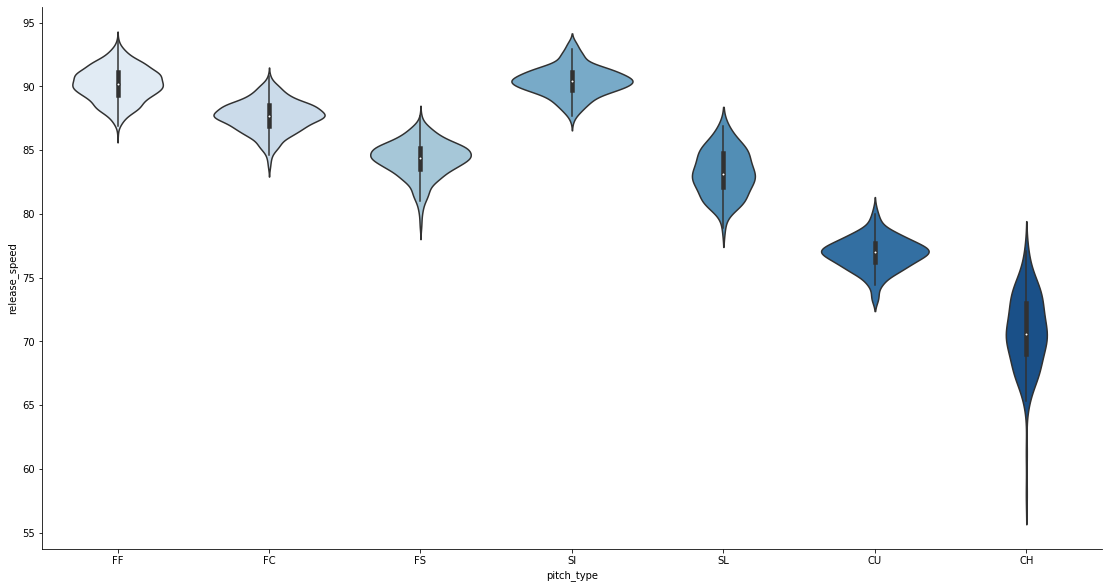

In [22]:
vio = sns.catplot(x = 'pitch_type', 
            y = 'release_speed', 
            kind = 'violin', 
            data=sanchez, 
            order = ['FF', 'FC', 'FS', 'SI', 'SL', 'CU', 'CH'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

vio.savefig('../viz/pitch_type_speed_violins_sanchez.png')

### Key takeaway: Consider combining the slider and curveball pitches to one category
- Good separation between four seem fastball, fastball cutter, and the change up
- The slider and curveball exhibit closer mph than other pitches

### events
- This will be an interesting feature for other experiments, but not for this one
- Adding to a kill_col list that will be used to drop all killed columns in one line at the end of this notebook

In [23]:
sanchez.events.value_counts();

In [24]:
kill_cols = ['events']

### description
- Same as events just above

In [25]:
kill_cols.append('description')

### des
- Don't need this columns after inspection
    - Same reasons as events and description

In [26]:
kill_cols.append('des')

### release_spin_rate
- Variable type: Independant, Continuous
- Data type: Int
- Unique Values: n/a

In [27]:
sanchez.release_spin_rate.describe();

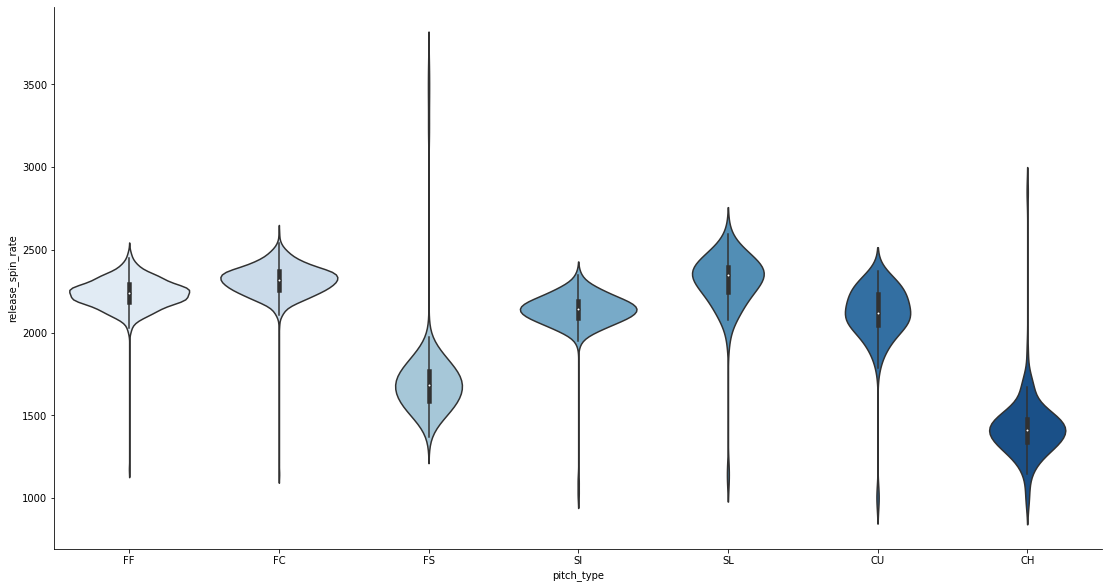

In [28]:
cat = sns.catplot(x = 'pitch_type', 
            y = 'release_spin_rate', 
            kind = 'violin', 
            data=sanchez, 
            order = ['FF', 'FC', 'FS', 'SI', 'SL', 'CU', 'CH'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

cat.savefig('../viz/pitch_type_spin_violins_sanchez.png')

### stand
- Is R or L for the handedness of the batter
- Will be a categorical, independant variable
- Relativley even totals between the two classes

In [29]:
sanchez.stand.value_counts()

R    1438
L    1252
Name: stand, dtype: int64

### zone
- Variable type: Independant, Continuous
- Data type: Int
- Number unique Values: 13
    - This is an integral dependant variable in the experiment and indicates where the pitch is thrown in or out of the strike zone
    - These number 1 - 14 
    - For example, with a right-handed hitter zone 3 is high and inside whereas for a left-handed hitter zone 3 is high and outside
    
<br>
<img src='../../images/statcast_zones.png' alt='Drawing' style='width: 450px;'/><br>

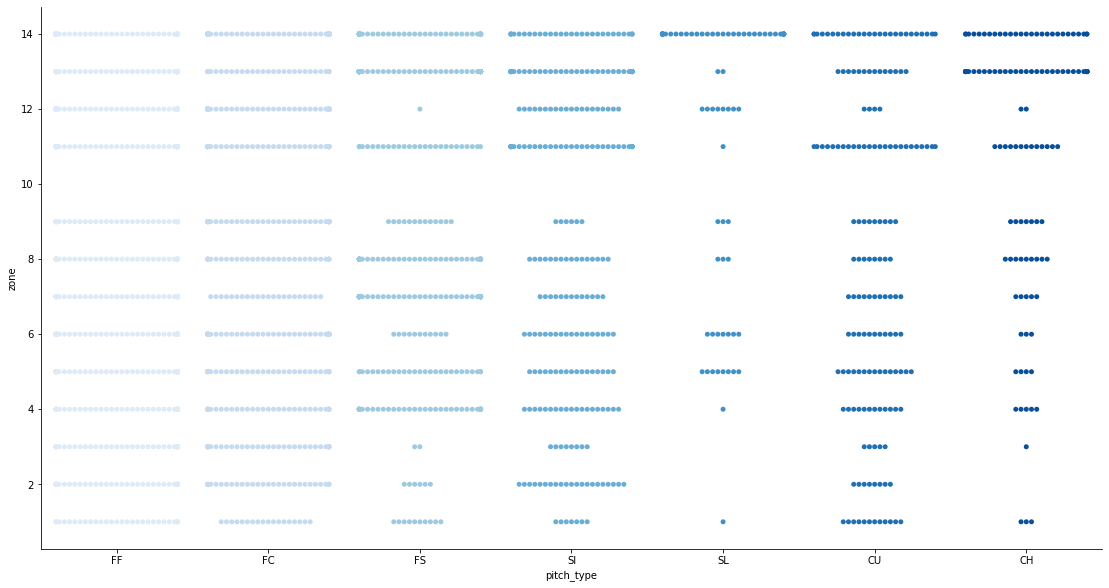

In [30]:
zone = sns.catplot(x = 'pitch_type', 
            y = 'zone', 
            kind = 'swarm', 
            data=sanchez, 
            order = ['FF', 'FC', 'FS', 'SI', 'SL', 'CU', 'CH'], 
            palette='Blues',
            height=8.27, 
            aspect=15/8);

zone.savefig('../viz/pitch_type_zone_swarm_sanchez.png')

 __Key Takeaway:__ Need to consider combining zone with handedness of the batter to discern "inside" or "outside" categories vs. numeric values

### home_team
- Will be an interesting feature to explore in relation to the Nationals only

In [31]:
sanchez.home_team.value_counts()

WSH    1312
PHI     279
ATL     177
MIA     174
CHC     112
DET     110
COL      98
MIN      94
LAD      89
NYM      89
SF       87
CWS      69
Name: home_team, dtype: int64

### nats_home1_away0 (new feature)

In [32]:
sanchez['nats_home1_away0'] = sanchez.home_team.apply(lambda h: 1 if h == 'WSH' else 0)

In [33]:
sanchez.nats_home1_away0.value_counts()

0    1378
1    1312
Name: nats_home1_away0, dtype: int64

### away_team
- Don't need this column as home_team indicates if the Nats are home or away

In [34]:
kill_cols.append('away_team')

### type column
- Indicates if the pitch was a ball (taken), strike (taken), or a hit (indicated with X)
- Result of pitch occurs after the pitch and does not relate to location so will be removed

In [35]:
sanchez.type.value_counts()

S    1210
B     964
X     516
Name: type, dtype: int64

In [36]:
kill_cols.append('type')

### balls
- When combined with strikes, the count of the pitch is created
- Will be key categorical, independant variable
- After new column creation, feature no longer need and to be added to kill_cols

In [37]:
kill_cols.append('balls')

### strikes
- When combined with balls, creates the count
- Will be key categorical, independant variable
- After new column creation, feature no longer need and to be added to kill_cols

In [38]:
kill_cols.append('strikes')

### balls_strikes (new feature)
- Combines balls and strikes as a string/Pandas object

In [39]:
sanchez['balls_strikes'] = sanchez.balls.astype(str) + '_' + sanchez.strikes.astype(str)

In [40]:
sanchez.balls_strikes.value_counts()

0_0    705
0_1    351
1_1    292
1_2    257
1_0    251
2_2    216
3_2    164
0_2    159
2_1    145
2_0     79
3_1     48
3_0     23
Name: balls_strikes, dtype: int64

Wow, Mad Max only had sixteen 3-0 counts in the 2019 regular season?  That is impressive.

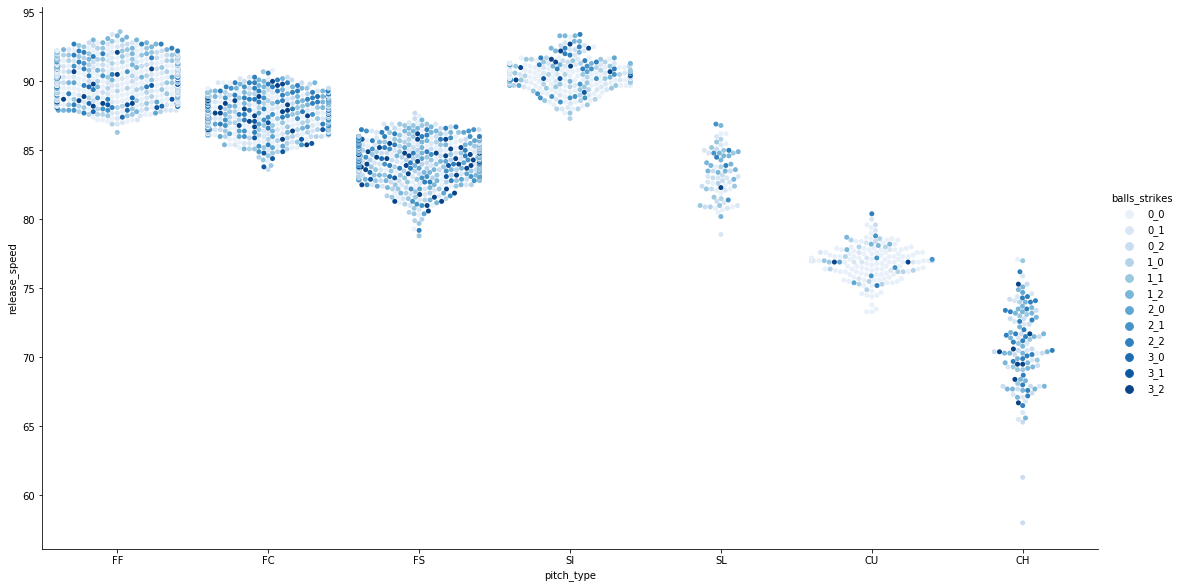

In [41]:
counts = sns.catplot(x = 'pitch_type', 
            y = 'release_speed', 
            kind = 'swarm', 
            data = sanchez, 
            order = ['FF', 'FC', 'FS', 'SI', 'SL', 'CU', 'CH'], 
            palette = 'Blues',
            hue = 'balls_strikes',
            height = 8.27, 
            aspect = 15/8);

counts.savefig('../viz/pitch_type_speed_count_swarm_sanchez.png')

__Key Takeaway__: On superficial inspection, it looks like random spread of pitch selection and velocity by count values

### on_3b
- null if no runner on 3rd base and player ID of plyer on 3rd if occupied
- Will change to 0 if empty and 1 if occupied for this experiment

In [42]:
sanchez.on_3b = sanchez.on_3b.fillna(value=0)

In [43]:
sanchez.on_3b

0       664068.0
1            0.0
2            0.0
3            0.0
4            0.0
          ...   
2685         0.0
2686         0.0
2687         0.0
2688         0.0
2689         0.0
Name: on_3b, Length: 2690, dtype: float64

In [44]:
sanchez.on_3b = sanchez.on_3b.apply(lambda r3: 0 if r3 == 0 else 1)

In [45]:
sanchez.on_3b.value_counts()

0    2474
1     216
Name: on_3b, dtype: int64

### on_2b
- Same treatment as on_3b

In [46]:
sanchez.on_2b = sanchez.on_2b.fillna(value=0)
sanchez.on_2b
sanchez.on_2b = sanchez.on_2b.apply(lambda r2: 0 if r2 == 0 else 1)
sanchez.on_2b.value_counts()

0    2203
1     487
Name: on_2b, dtype: int64

### on_1b
- Same treatment as on_3b

In [47]:
sanchez.on_1b = sanchez.on_1b.fillna(value=0)
sanchez.on_1b
sanchez.on_1b = sanchez.on_1b.apply(lambda r1: 0 if r1 == 0 else 1)
sanchez.on_1b.value_counts()

0    1974
1     716
Name: on_1b, dtype: int64

### all_runners (new feature)
- Combines on_1b, on_2b, and on_3b as one, categorical variable

In [48]:
sanchez['all_runners'] = 'fb:' + sanchez.on_1b.iloc[:].astype(str) + '_' + \
                            'sb:' + sanchez.on_2b.iloc[:].astype(str) + '_' +\
                            'tb:' + sanchez.on_3b.iloc[:].astype(str)

In [49]:
sanchez.all_runners.value_counts()

fb:0_sb:0_tb:0    1673
fb:1_sb:0_tb:0     403
fb:1_sb:1_tb:0     203
fb:0_sb:1_tb:0     195
fb:0_sb:0_tb:1      81
fb:1_sb:1_tb:1      64
fb:1_sb:0_tb:1      46
fb:0_sb:1_tb:1      25
Name: all_runners, dtype: int64

In [50]:
sanchez.columns

Index(['pitch_type', 'game_date', 'batter', 'release_speed', 'events',
       'description', 'zone', 'des', 'stand', 'home_team', 'away_team', 'type',
       'balls', 'strikes', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning',
       'inning_topbot', 'sv_id', 'release_spin_rate', 'pitch_number',
       'pitch_name', 'bat_score', 'fld_score', 'if_fielding_alignment',
       'of_fielding_alignment', 'nats_home1_away0', 'balls_strikes',
       'all_runners'],
      dtype='object')

Wow, Mad Max only had the bases loaded twenty times all season, impressive.

### outs_when_up
- Outs when batter is at the plate
- Quantities of each class are close in aggregate value

In [51]:
sanchez.outs_when_up.value_counts()

1    939
0    931
2    820
Name: outs_when_up, dtype: int64

### inning
- Indicates what inning the pitch was thrown

In [52]:
sanchez.inning.value_counts()

4    516
1    504
2    455
3    442
5    368
6    303
7     81
9     14
8      7
Name: inning, dtype: int64

### inning_topbot
- Don't need this feature as it results from the Nats being home or away
- Adding to kill_cols

In [53]:
kill_cols.append('inning_topbot')

### sv_id
- Used to order pitches chronologically when ascending
- Will be retained until ordering pitches is no longer neccessary

### pitch_number
- Equals the running count of pitches thrown to the batter in that appearance;
- Resets with each new batter

In [54]:
sanchez.pitch_number

0       6
1       5
2       4
3       3
4       2
       ..
2685    1
2686    4
2687    3
2688    2
2689    1
Name: pitch_number, Length: 2690, dtype: int64

### pitch_name
- Redundant column for pitch_type column
- Will remove

In [55]:
kill_cols.append('pitch_name')

### bat_score
- Score of batting team aka not the Nats
- Will change to opp_score (opponent score)

In [56]:
sanchez = sanchez.rename(columns={'bat_score': 'opp_score'})

### fld_score
- Score of fielding team aka the Nats
- Will change to nat_score

In [57]:
sanchez = sanchez.rename(columns={'fld_score': 'nats_score'})

### if_fielding_alignment
- Indicates standard or shift of the infield

In [58]:
sanchez.if_fielding_alignment.value_counts()

Standard         2015
Infield shift     504
Strategic         170
Name: if_fielding_alignment, dtype: int64

### of_fielding_alignment
- Indicates standard or shift of the outfield

In [59]:
sanchez.of_fielding_alignment.value_counts()

Standard     2474
Strategic     215
Name: of_fielding_alignment, dtype: int64

## That's a good start to our data set, at this point, we will export to csv and continue in the next step

In [60]:
sanchez = sanchez.drop(columns=kill_cols)

In [61]:
sanchez.to_csv('../../data/processed/sanchez/sanchez_cleaned.csv')